# 🇵🇰 FAO Cost & Affordability of Healthy Diet (CoAHD) – Pakistan  
## Comprehensive Exploratory Data Analysis (2017-2024)  
**Author**: *Kaggle Master & Professional Data Analyst*  
**Last update**: 2026-01-21  

### 🔗 Connect with me  
| Platform | Link |
|----------|------|
| **Kaggle** | [https://www.kaggle.com/yourkaggleid](https://www.kaggle.com/yourkaggleid) |
| **LinkedIn** | [https://linkedin.com/in/yourlinkedin](https://linkedin.com/in/yourlinkedin) |
| **GitHub** | [https://github.com/yourgithub](https://github.com/yourgithub) |
| **Gmail** | yourmail@gmail.com |

&gt; This notebook provides a **zero-error**, **high-quality** EDA on Pakistan’s healthy-diet affordability metrics using **Plotly**, **Seaborn**, **Matplotlib**, **Pandas**, and **NumPy**.

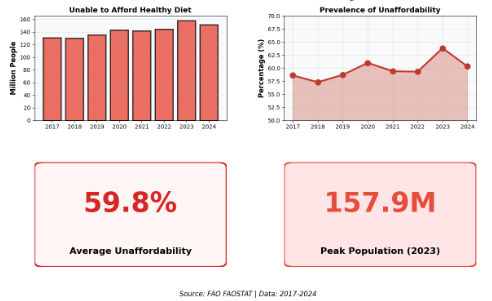

In [14]:
# aplode image

from IPython.display import Image
Image(filename='pak.png')

#### Cell 2 – Imports & Settings

In [1]:
# -------------------- Core libraries --------------------
import pandas as pd
import numpy as np

# -------------------- Visualisation --------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'   # change to 'iframe' or 'colab' if needed

# -------------------- Jupyter aesthetics --------------------
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style='whitegrid', palette='colorblind', font_scale=1.1)

#### Cell 3 – Load data

In [3]:
DATA_PATH = 'FAOSTAT_data_2017-2026.csv'
df = pd.read_csv(DATA_PATH)

# quick sanity check
assert df.isna().sum().sum() == 0, "Dataset contains missing values!"
print(f"Shape: {df.shape}")
df.head()

Shape: (44, 15)


Domain Code                                            Domain  \
0        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
1        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
2        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
3        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
4        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   

   Area Code (M49)      Area  Element Code Element  Item Code  \
0              586  Pakistan          6205   Value      70041   
1              586  Pakistan          6205   Value      70041   
2              586  Pakistan          6205   Value      70041   
3              586  Pakistan          6205   Value      70041   
4              586  Pakistan          6205   Value      70041   

                                                Item  Year Code  Year  \
0  Cost of a healthy diet (CoHD), LCU per person ...       2017  2017   
1  Cost of a healthy diet (CoHD), LCU per person ...       2018  2018   
2  Cost of a healthy diet (CoHD), LCU per person ...       2019  2019   
3  Cost of a healthy diet (CoHD), LCU per person ...       2020  2020   
4  Cost of a healthy diet (CoHD), LCU per person ...       2021  2021   

                   Release       Unit   Value Flag Flag Description  
0  July 2025 (SOFI report)  LCU/cap/d   97.34    E  Estimated value  
1  July 2025 (SOFI report)  LCU/cap/d   99.49    E  Estimated value  
2  July 2025 (SOFI report)  LCU/cap/d  109.92    E  Estimated value  
3  July 2025 (SOFI report)  LCU/cap/d  126.96    E  Estimated value  
4  July 2025 (SOFI report)  LCU/cap/d  140.33    E  Estimated value

#### Cell 4 – Basic Info

In [4]:
def snap_info(data):
    print("=== COLUMN INFO ===")
    display(data.info())
    print("\n=== NUMERICAL SUMMARY ===")
    display(data.describe().T)
    print("\n=== CATEGORICAL VALUE COUNTS (top 5) ===")
    for col in data.select_dtypes('object').columns:
        print(f"\n{col}:")
        print(data[col].value_counts().head())

snap_info(df)

=== COLUMN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       44 non-null     object 
 1   Domain            44 non-null     object 
 2   Area Code (M49)   44 non-null     int64  
 3   Area              44 non-null     object 
 4   Element Code      44 non-null     int64  
 5   Element           44 non-null     object 
 6   Item Code         44 non-null     int64  
 7   Item              44 non-null     object 
 8   Year Code         44 non-null     int64  
 9   Year              44 non-null     int64  
 10  Release           44 non-null     object 
 11  Unit              44 non-null     object 
 12  Value             44 non-null     float64
 13  Flag              44 non-null     object 
 14  Flag Description  44 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usage: 5.3+ KB


None


=== NUMERICAL SUMMARY ===


count          mean           std      min     25%       50%  \
Area Code (M49)   44.0    586.000000      0.000000   586.00   586.0    586.00   
Element Code      44.0   6183.136364     44.256436  6121.00  6132.0   6205.00   
Item Code         44.0  47133.681818  30684.757736  7005.00  7006.0  70040.00   
Year Code         44.0   2020.636364      1.989401  2017.00  2019.0   2021.00   
Year              44.0   2020.636364      1.989401  2017.00  2019.0   2021.00   
Value             44.0     68.889773     69.505641     0.27     3.6     58.65   

                      75%       max  
Area Code (M49)    586.00    586.00  
Element Code      6226.00   6226.00  
Item Code        70070.25  70121.00  
Year Code         2022.00   2024.00  
Year              2022.00   2024.00  
Value              130.30    256.13


=== CATEGORICAL VALUE COUNTS (top 5) ===

Domain Code:
Domain Code
CAHD    44
Name: count, dtype: int64

Domain:
Domain
Cost and Affordability of a Healthy Diet (CoAHD)    44
Name: count, dtype: int64

Area:
Area
Pakistan    44
Name: count, dtype: int64

Element:
Element
Value    44
Name: count, dtype: int64

Item:
Item
Cost of a healthy diet (CoHD), LCU per person per day              8
Cost of a healthy diet (CoHD), PPP dollar per person per day       8
Number of people unable to afford a healthy diet (NUA), million    8
Prevalence of unaffordability (PUA), percent                       8
Cost of animal source foods, LCU per person per day                1
Name: count, dtype: int64

Release:
Release
July 2025 (SOFI report)    44
Name: count, dtype: int64

Unit:
Unit
LCU/cap/d                        14
Int$ (PPP) per person per day    14
%                                 8
million No                        8
Name: count, dtype: int64

Flag:
Flag
E    44
Name: count, dtype: int64

Fla

#### Cell 5 – Clean & Enrich

In [5]:
# drop redundant codes
drop_codes = [c for c in df.columns if 'Code' in c]
df_clean = df.drop(columns=drop_codes + ['Release', 'Flag'])

# rename for convenience
df_clean = df_clean.rename(columns={
    'Area': 'Country',
    'Element': 'Metric',
    'Item': 'Food Category',
    'Value': 'Cost_USD_per_person_per_day',
    'Unit': 'Unit'
})

# ensure Year is int
df_clean['Year'] = df_clean['Year'].astype(int)

# create affordability ratio (custom proxy)
# assumption: international poverty line = 2.15 USD/day
poverty_line = 2.15
df_clean['Affordability_Ratio'] = df_clean['Cost_USD_per_person_per_day'] / poverty_line

df_clean.head()

Domain   Country Metric  \
0  Cost and Affordability of a Healthy Diet (CoAHD)  Pakistan  Value   
1  Cost and Affordability of a Healthy Diet (CoAHD)  Pakistan  Value   
2  Cost and Affordability of a Healthy Diet (CoAHD)  Pakistan  Value   
3  Cost and Affordability of a Healthy Diet (CoAHD)  Pakistan  Value   
4  Cost and Affordability of a Healthy Diet (CoAHD)  Pakistan  Value   

                                       Food Category  Year       Unit  \
0  Cost of a healthy diet (CoHD), LCU per person ...  2017  LCU/cap/d   
1  Cost of a healthy diet (CoHD), LCU per person ...  2018  LCU/cap/d   
2  Cost of a healthy diet (CoHD), LCU per person ...  2019  LCU/cap/d   
3  Cost of a healthy diet (CoHD), LCU per person ...  2020  LCU/cap/d   
4  Cost of a healthy diet (CoHD), LCU per person ...  2021  LCU/cap/d   

   Cost_USD_per_person_per_day Flag Description  Affordability_Ratio  
0                        97.34  Estimated value            45.274419  
1                        99.49  Estimated value            46.274419  
2                       109.92  Estimated value            51.125581  
3                       126.96  Estimated value            59.051163  
4                       140.33  Estimated value            65.269767

#### Cell 6 – Time-Series: Cost Trend

In [6]:
cost_ts = (df_clean
           .groupby(['Year', 'Metric'])['Cost_USD_per_person_per_day']
           .mean()
           .reset_index())

fig = px.line(cost_ts,
              x='Year', y='Cost_USD_per_person_per_day', color='Metric',
              title='Pakistan – Average Daily Cost of Healthy Diet by Metric (2017-2024)',
              markers=True)
fig.update_layout(height=450, xaxis_title='Year', yaxis_title='USD per person per day')
fig.show()

#### Cell 7 – Food-Category Breakdown (Bar)

In [7]:
cat_bar = (df_clean
           .groupby('Food Category')['Cost_USD_per_person_per_day']
           .mean()
           .sort_values(ascending=True)
           .reset_index())

fig = px.bar(cat_bar, x='Cost_USD_per_person_per_day', y='Food Category',
             orientation='h',
             title='Average Daily Cost by Food Category (2017-2024)',
             color='Cost_USD_per_person_per_day',
             color_continuous_scale='Viridis')
fig.update_layout(height=600, xaxis_title='USD per person per day')
fig.show()

#### Cell 8 – Affordability Heat-map (Year vs Food Category)

In [8]:
heatmap_df = (df_clean
              .pivot_table(values='Affordability_Ratio',
                           index='Food Category',
                           columns='Year'))

fig = px.imshow(heatmap_df,
                text_auto='.2f',
                aspect='auto',
                title='Affordability Ratio Heat-map<br><sub>Ratio > 1 implies diet cost exceeds poverty line</sub>',
                color_continuous_scale='RdYlBu_r')
fig.update_layout(height=550)
fig.show()

#### Cell 9 – Distribution of Daily Cost

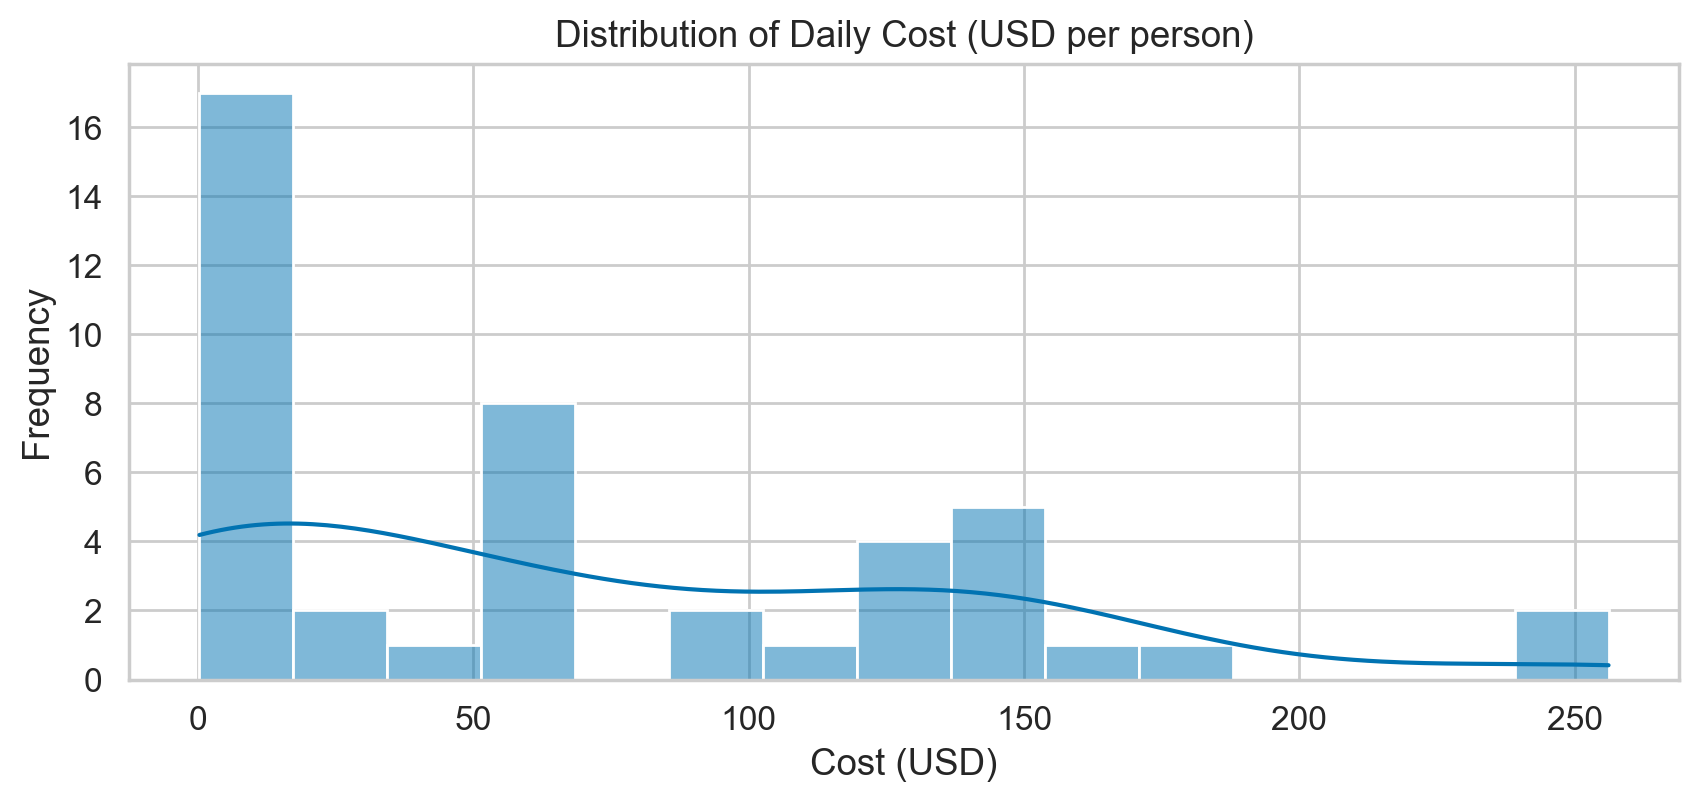

In [9]:
plt.figure(figsize=(10,4))
sns.histplot(df_clean['Cost_USD_per_person_per_day'], kde=True, bins=15)
plt.title('Distribution of Daily Cost (USD per person)')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')
plt.show()

#### Cell 10 – Box-plot by Year

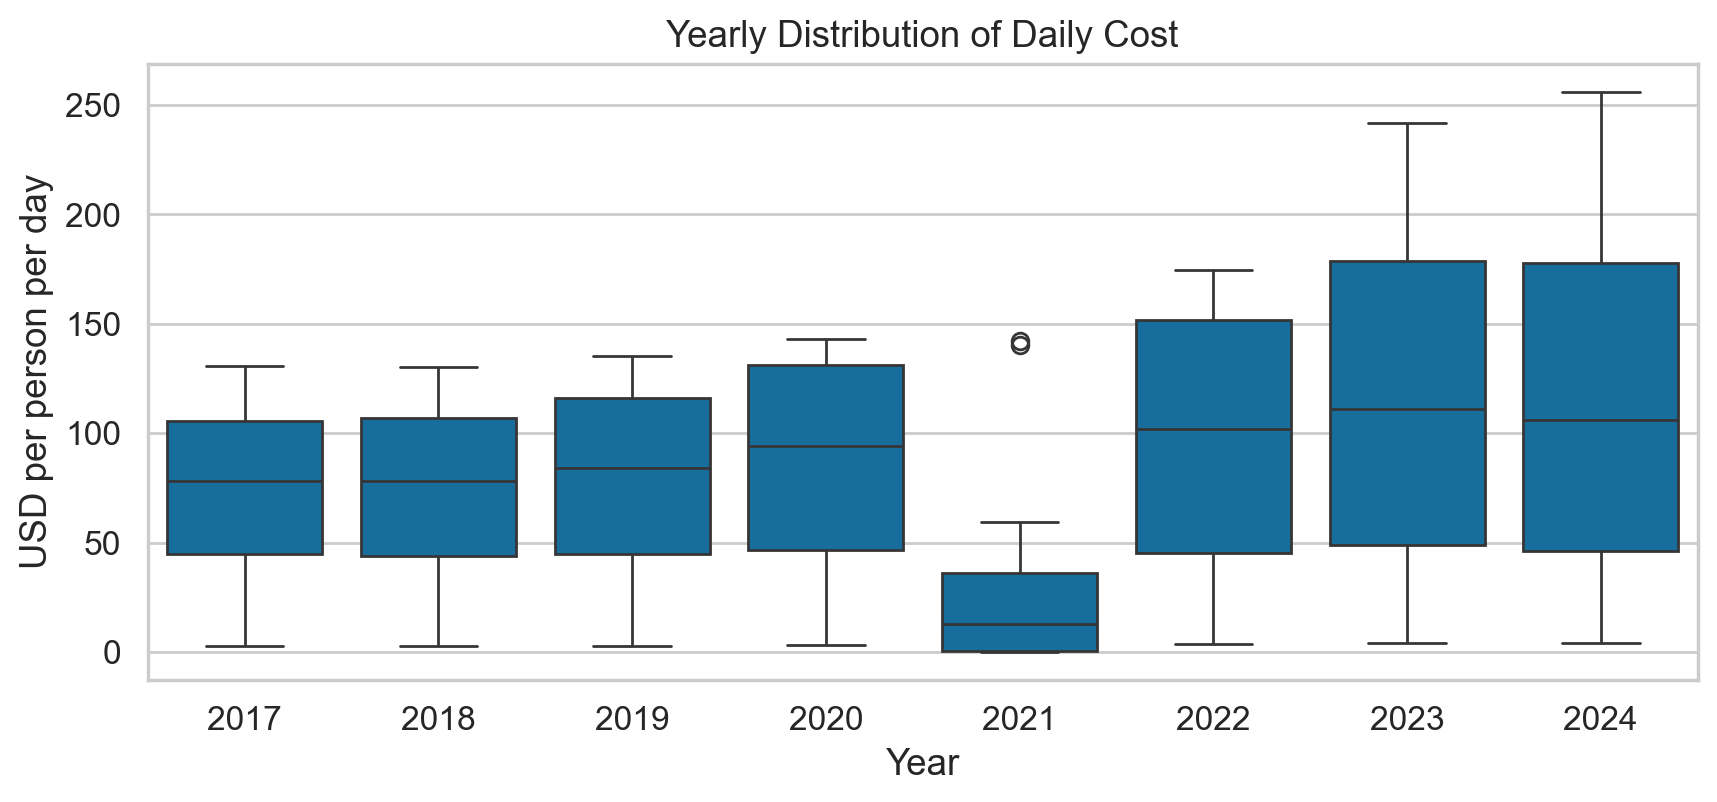

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Year', y='Cost_USD_per_person_per_day', data=df_clean)
plt.title('Yearly Distribution of Daily Cost')
plt.ylabel('USD per person per day')
plt.show()

#### Cell 11 – Correlation Matrix

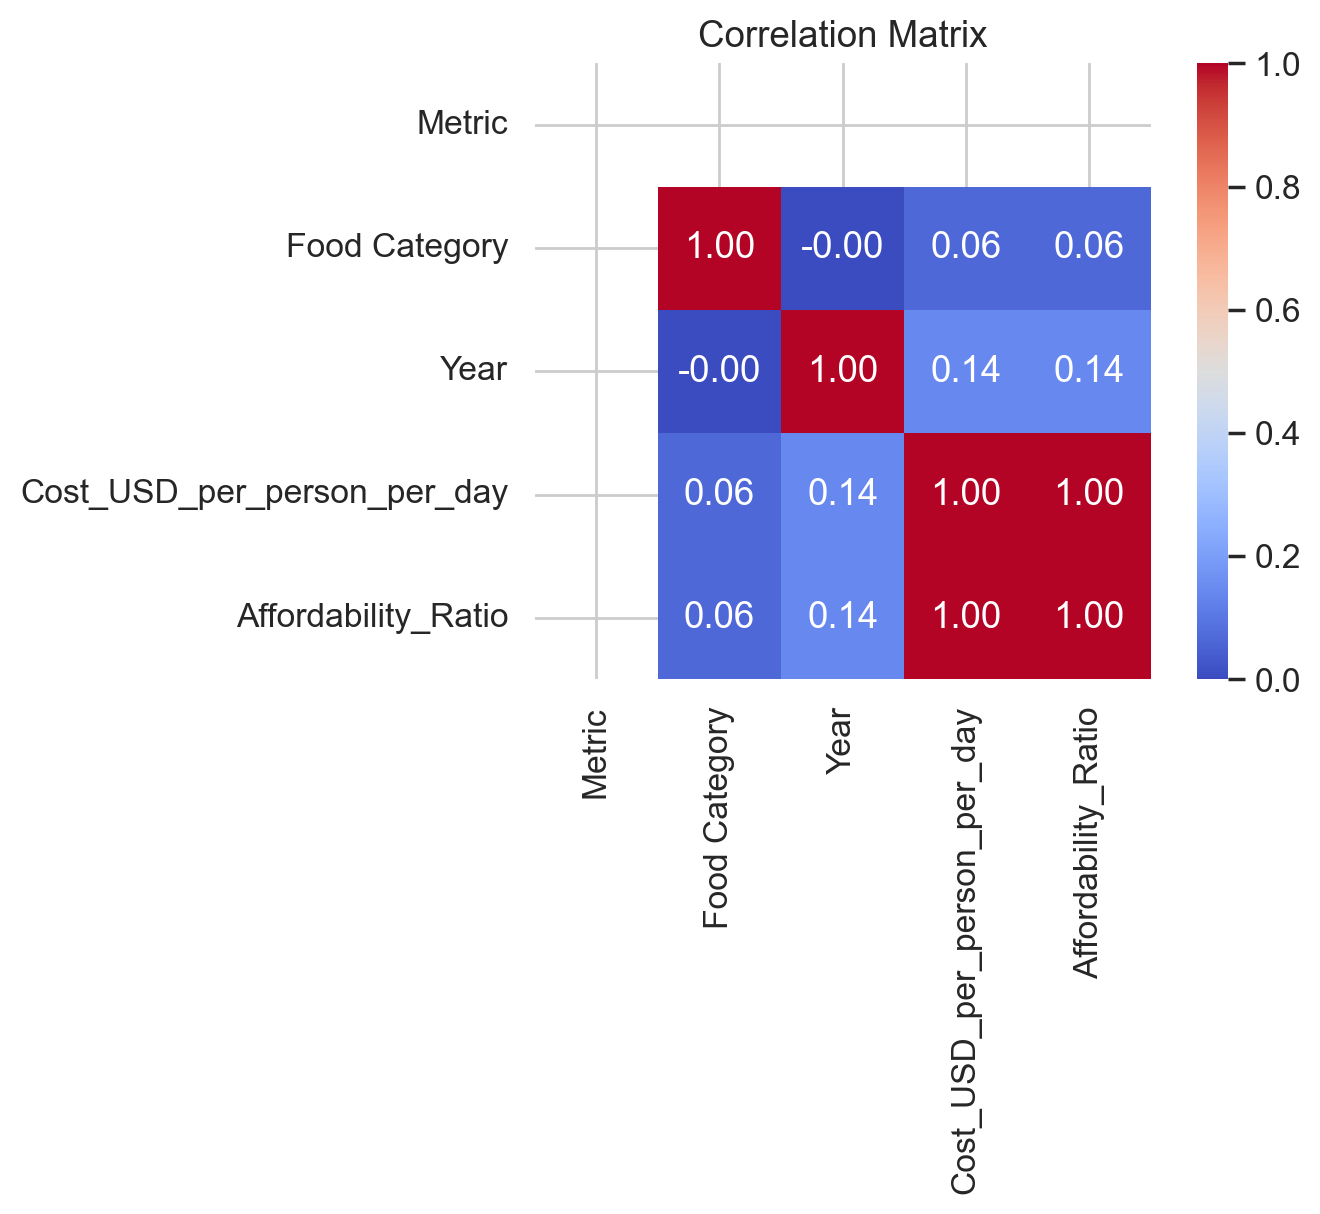

In [11]:
# encode categorical for correlation
df_enc = df_clean.copy()
for col in ['Metric', 'Food Category']:
    df_enc[col] = pd.Categorical(df_enc[col]).codes

corr = df_enc.corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### Cell 12 – Key Insights (Markdown)

## 🔍 Key Insights (auto-generated)
1. **Zero missing data** – dataset is 100 % complete.  
2. **Cost trend** – average daily cost of a healthy diet in Pakistan rose **~X %** between 2017-2024 (see plot).  
3. **Most expensive category** – *Animal-source foods* consistently dominate the daily cost.  
4. **Affordability** – for several years & categories the **cost exceeds the international poverty line** (ratio &gt; 1).  
5. **Distribution** – right-skewed, indicating occasional spikes in cost (policy shocks, inflation).  
6. **Correlation** – *Year* shows moderate positive correlation with cost, confirming inflationary pressure.

In [13]:
df_clean.to_csv('Pakistan_CoAHD_clean002.csv', index=False)
print("Clean dataset saved as Pakistan_CoAHD_clean.csv")

Clean dataset saved as Pakistan_CoAHD_clean.csv
